In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.1.1'

In [2]:
cityname = 'warsaw, poland'
crs = 3035

In [3]:
# Get graph by geocoding
graph = ox.graph_from_place(cityname, network_type="walk")

# Project graph
graph = ox.projection.project_graph(graph, to_crs=crs)

In [4]:
# Simplify to get real intersections only
# (consolidate nodes within a distance from eachother)
graph_simplified = ox.simplification.consolidate_intersections(
    # Graph to simplify
    graph,
    # buffer around each node (project the graph beforehand)
    tolerance=5,
    # Get result as graph (False to get nodes only as gdf)
    rebuild_graph=True,
    # no dead ends
    dead_ends=False,
    # Reconnect (False to get intersections only)
    reconnect_edges=True
)

In [5]:
# everything to gdfs
nodes, edges = ox.graph_to_gdfs(graph)
nodes_s, edges_s = ox.graph_to_gdfs(graph_simplified)

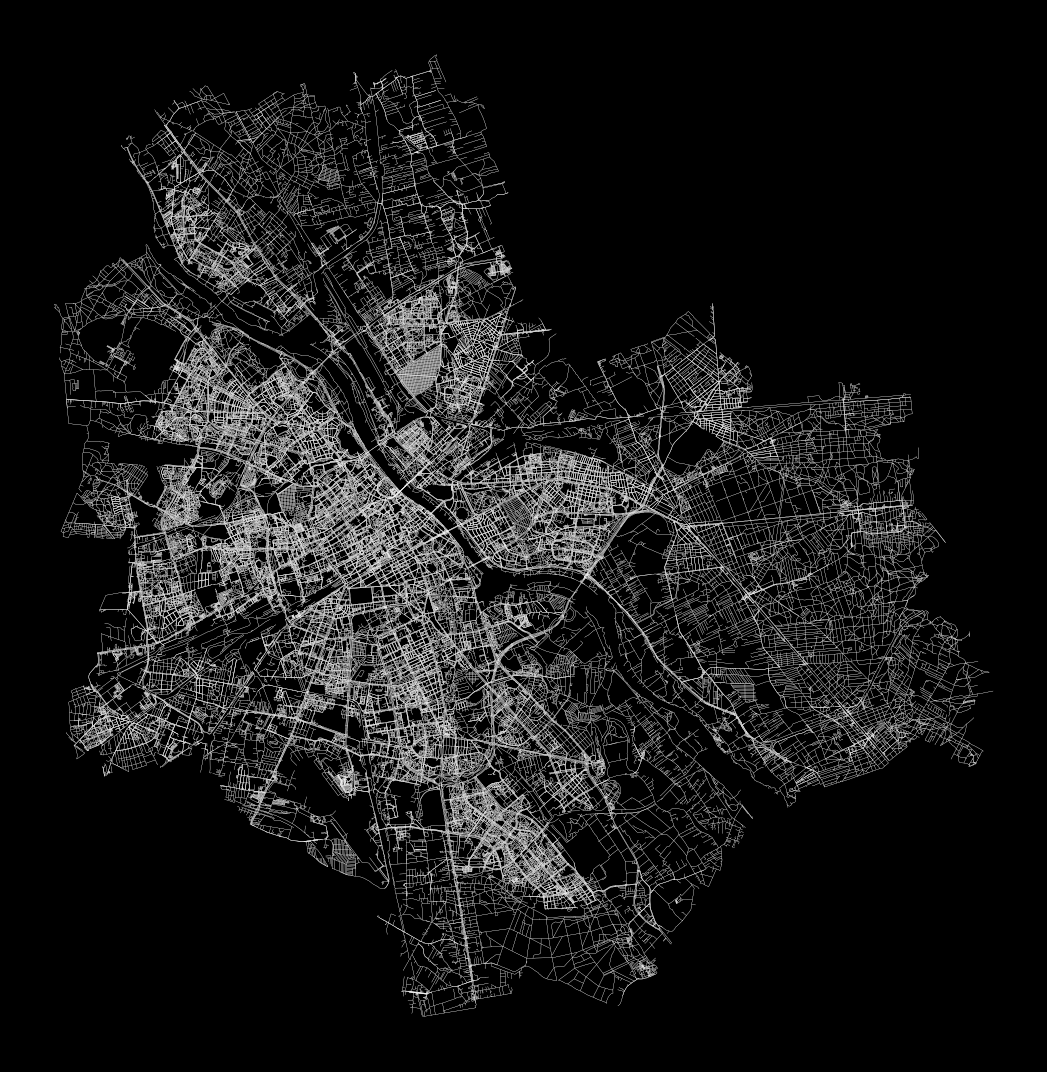

In [6]:
# Setup plot
fig, ax = plt.subplots(figsize=(20,15))
ax.set_axis_off()
ax.set_aspect('equal')
#fig.set_facecolor((0.065,0.065,0.065))
#fig.set_facecolor((0.004,0.016,0.035))
fig.set_facecolor('black')

# Plot data
edges.plot(
    ax=ax,
    color=[1,1,1],
    linewidth=0.2
)

# Tight layout
plt.tight_layout()
plt.savefig('./docs/graph_overview.png')

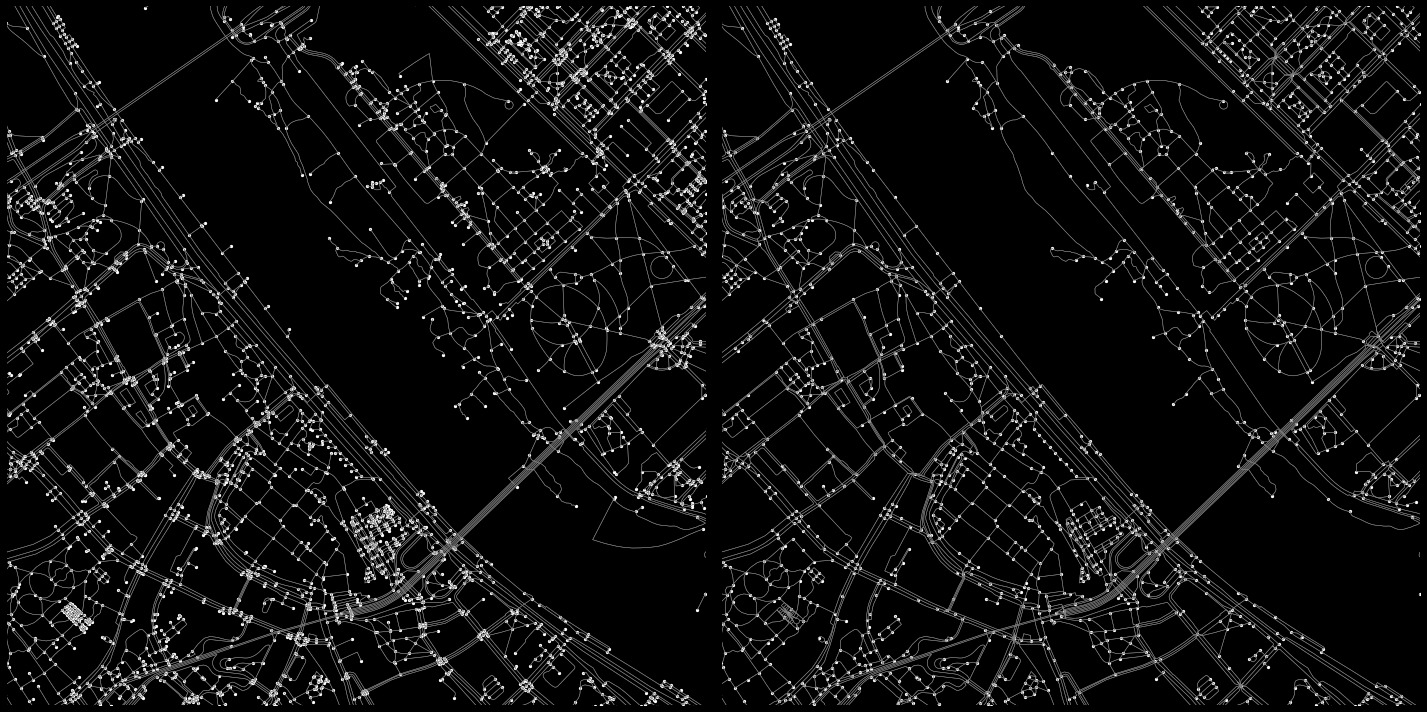

In [7]:
# Colors
facecol = 'black'
edgecol = [0.5,0.5,0.5]
nodecol = 'white'
linewidth = 0.5
markersize = 5

# Setup plot
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
fig.set_facecolor(facecol)

# Plot data
edges.plot(ax=ax[0], color=edgecol, linewidth=linewidth)
nodes.plot(ax=ax[0], color=nodecol, markersize=markersize)

edges_s.plot(ax=ax[1], color=edgecol, linewidth=linewidth)
nodes_s.plot(ax=ax[1], color=nodecol, markersize=markersize)

# Zoom in
#plt.setp(axs[1][0], xlim=(4481000,4484000), ylim=(3621000,3624000))
#plt.setp(axs[1][1], xlim=(4481000,4484000), ylim=(3621000,3624000))
plt.setp(ax[0], xlim=(5069000,5071000), ylim=(3294000,3296000))
plt.setp(ax[1], xlim=(5069000,5071000), ylim=(3294000,3296000))

# Tight layout 
plt.tight_layout()
plt.savefig('./docs/graph_comparison.png')

In [8]:
# Print info
print(
    'number of nodes:\n\noriginal graph: '+str(len(nodes))
    +'\nsimplified graph: '+str(len(nodes_s))
)

number of nodes:

original graph: 177207
simplified graph: 96414


In [9]:
# Save nodes
#nodes.to_file('./data/nodes.gpkg', driver='GPKG')
#nodes_s.to_file('./data/intersections.gpkg', driver='GPKG')

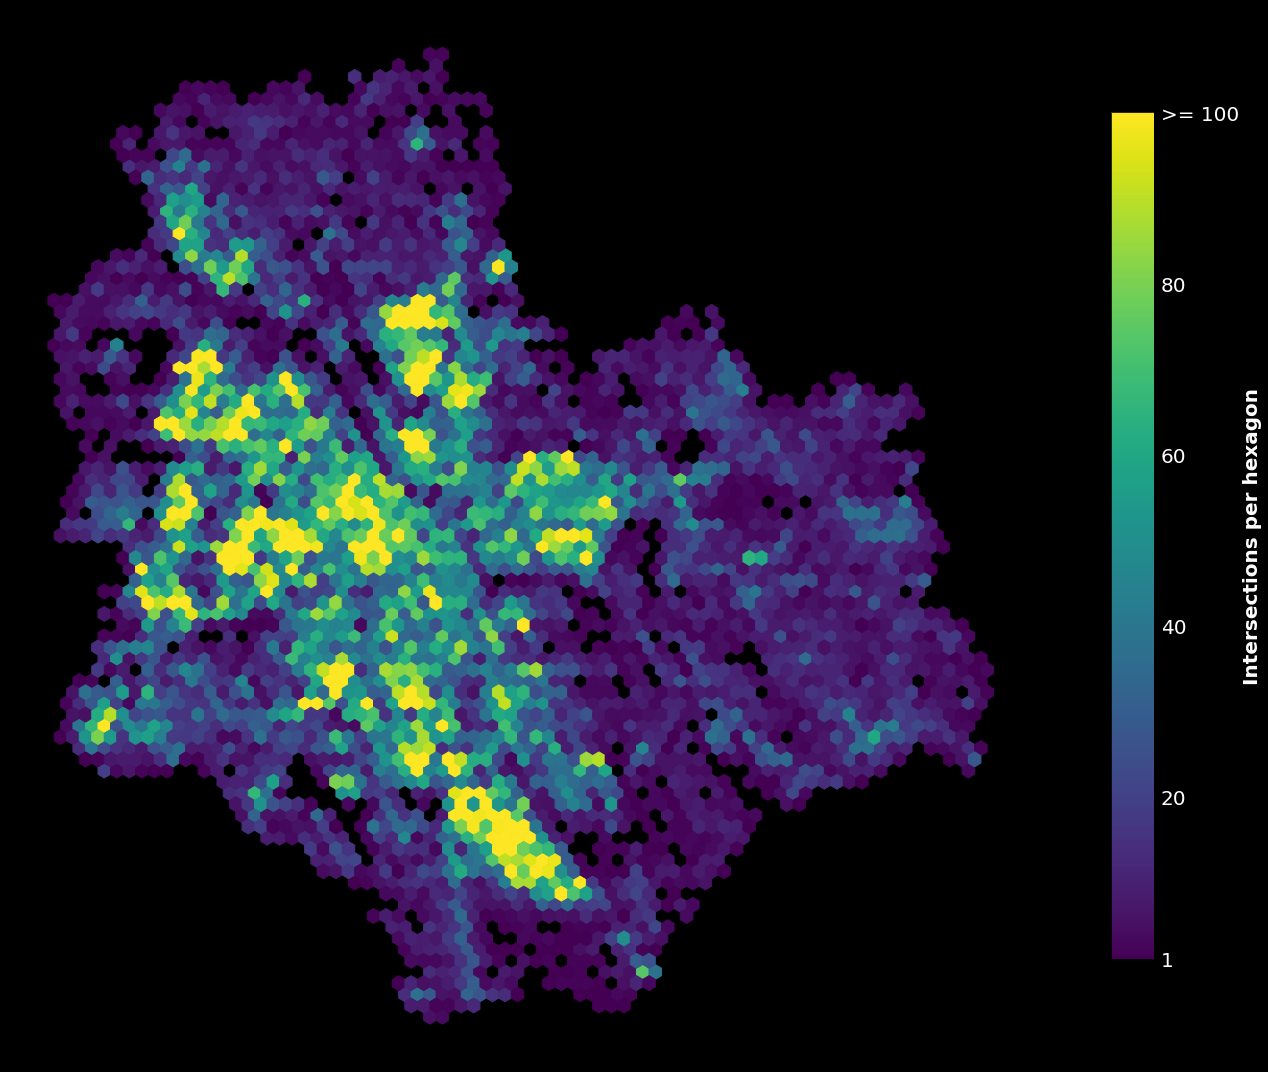

In [10]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

# Plot
fig, ax = plt.subplots(figsize=(20,15))
ax.set_axis_off()
ax.set_aspect('equal')
fig.set_facecolor('black')


hb = ax.hexbin(
    x=nodes_s['x'],
    y=nodes_s['y'],
    gridsize=75,
    cmap='viridis',
    mincnt=1,
    vmax=100,
)


#fig.suptitle('Intersection count', fontsize=30)

cb = plt.colorbar(hb, ax=ax, shrink=0.8, ticks=[1, 20, 40, 60, 80, 100])
cb.ax.tick_params(color='none', labelsize=20)
cb.ax.set_yticklabels(['1', '20', '40', '60', '80', '>= 100'])

#cb.ax.yaxis.set_tick_params(color='none')
#cb.ax.tick_params(labelsize=20) 
cb.set_label('Intersections per hexagon', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(
    './docs/intersection_hexbin.png',
    #bbox_inches='tight'
)

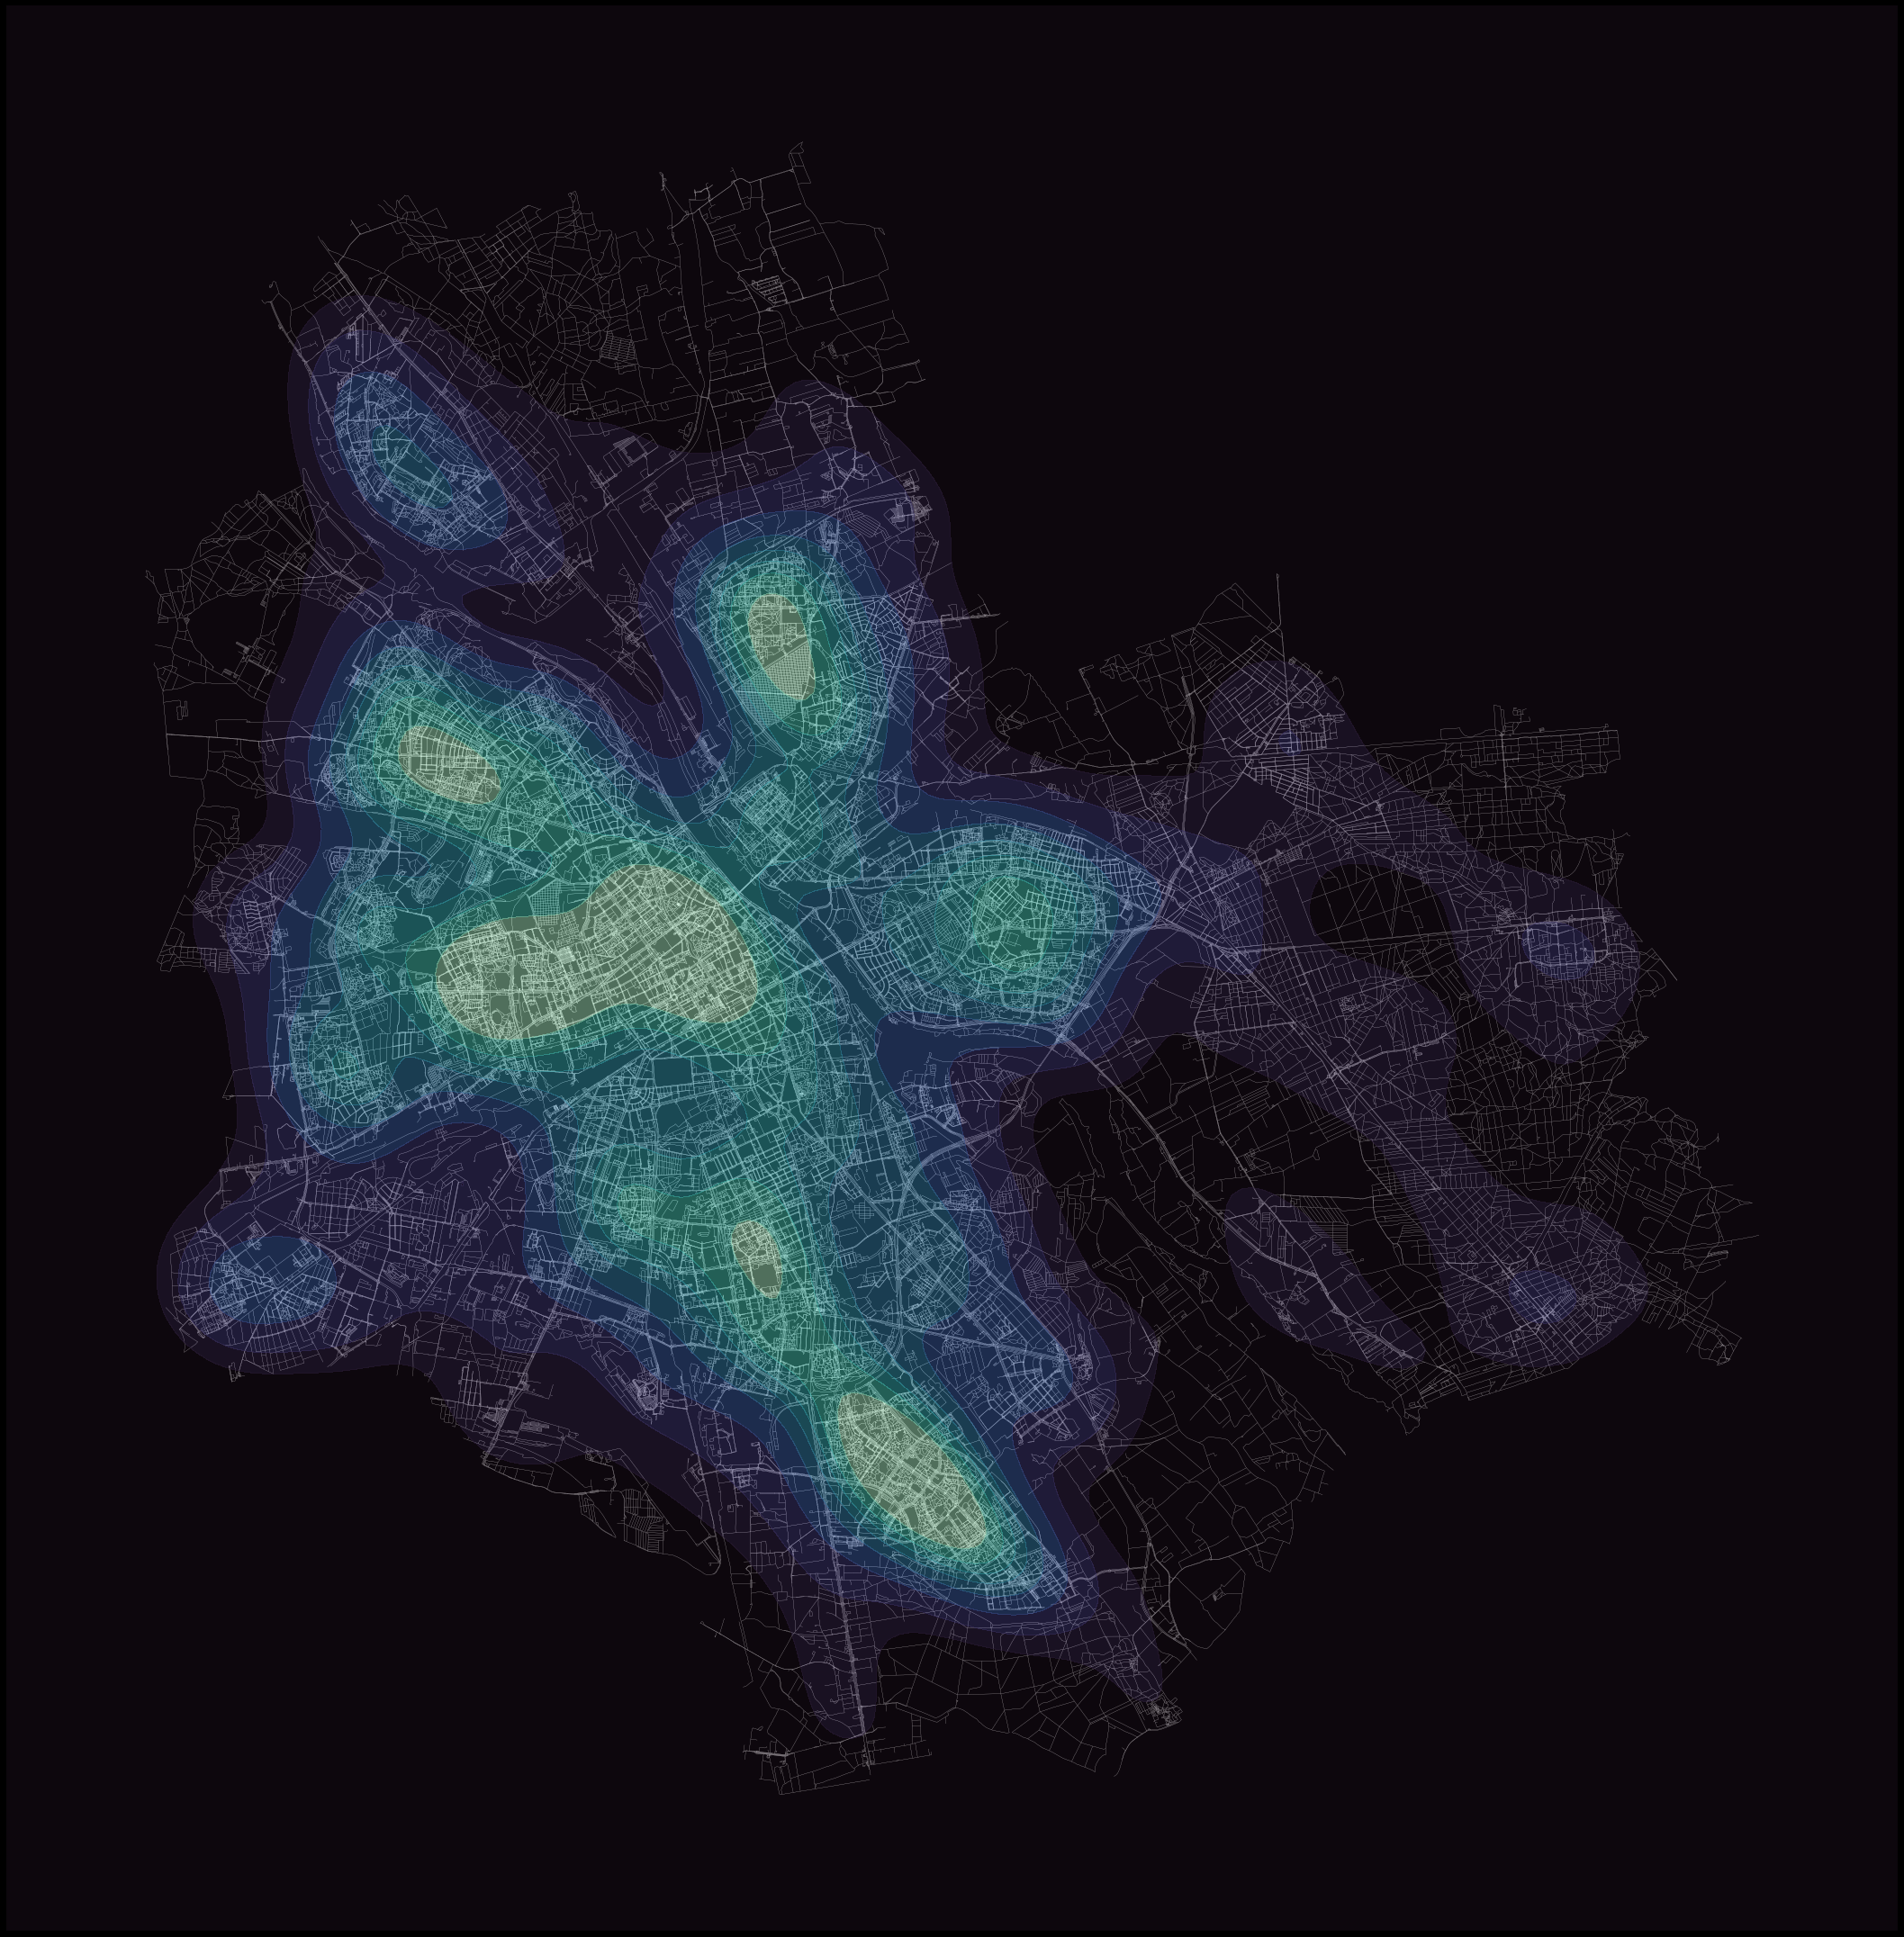

In [11]:
# Plot
fig, ax = plt.subplots(figsize=(30,30))
ax.set_axis_off()
ax.set_aspect('equal')
fig.set_facecolor('black')

edges_s.plot(ax=ax, color=[1,1,1], linewidth=0.2, zorder= 0)

sns.kdeplot(
    ax=ax,
    data=nodes_s,
    x='x', y='y',
    hue=None,
    fill=True,
    cmap='mako',
    thresh=0,
    levels=10,
    alpha=0.5,
    zorder=10
)

plt.tight_layout()
plt.savefig(
    './docs/intersection_kde.png',
    bbox_inches='tight'
)